In [1]:
import cv2,os

data_path='E:/HCMUS/XLDC/Project/dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [2]:
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(64,64))
            #resizing the gray scale into 64x64, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

Exception: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



In [3]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],64,64,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [4]:
np.save('data',data)
np.save('target',new_target)

In [5]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(16,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(128,activation='relu'))
#Dense layer of 128 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [8]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.1)

Epoch 1/20
97/98 [============================>.] - ETA: 0s - loss: 0.5344 - accuracy: 0.7188WARNING:tensorflow:From C:\Users\NGUYỄNTHỊTHUNHI\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model-001.model\assets
98/98 [==============================] - 9s 97ms/step - loss: 0.5353 - accuracy: 0.7180 - val_loss: 0.3872 - val_accuracy: 0.8439
Epoch 2/20
98/98 [==============================] - 9s 96ms/step - loss: 0.3416 - accuracy: 0.8531 - val_loss: 0.2750 - val_accuracy: 0.9046
Epoch 3/20
98/98 [==============================] - 10s 98ms/step - loss: 0.2434 - accuracy: 0.9019 - val_loss: 0.2367 - val_accuracy: 0.9017
Epoch 4/20
98/98 [=============================

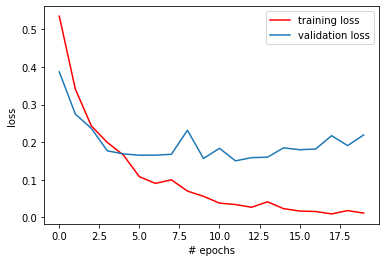

In [10]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

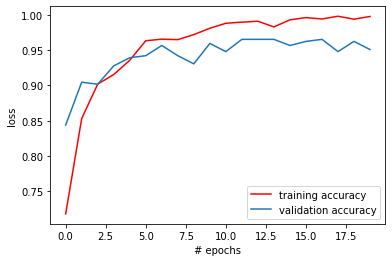

In [11]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
print(model.evaluate(test_data,test_target))

13/13 [==============================] - 0s 19ms/step - loss: 0.1531 - accuracy: 0.9558
[0.15308202803134918, 0.9558441638946533]


In [13]:
from keras.models import load_model
import cv2
import numpy as np

In [14]:
face_clsfr=cv2.CascadeClassifier('E:/HCMUS/XLDC/Project/haarcascade_frontalface_default.xml')

labels_dict={0:'No mask',1:'Mask'}
color_dict={0:(0,0,255),1:(0,255,0)}

# Thử trên ảnh

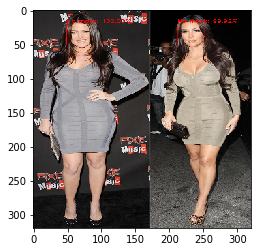

In [15]:
# Thử ném 1 ảnh vào
import cv2
img=cv2.imread('E:/HCMUS/XLDC/Project/test/T18.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces=face_clsfr.detectMultiScale(gray,1.3,5)  

for x,y,w,h in faces:
    face_img=gray[y:y+w,x:x+w]
    resized=cv2.resize(face_img,(64,64))
    normalized=resized/255.0
    reshaped=np.reshape(normalized,(1,64,64,1))
    result=model.predict(reshaped)
    num=np.argmax(result,axis=1)[0]
    
    (withoutMask,mask)=result[0]
    label = "{}: {:.2f}%".format(labels_dict[num], max(mask, withoutMask) * 100)

    cv2.putText(img, label, (x, y - 10),cv2.FONT_HERSHEY_SIMPLEX, 1, color_dict[num], 2)
    cv2.rectangle(img, (x, y), (x+w, y+h), color_dict[num], 2)

img = cv2.resize(img, (320,320))
#cv2.imshow('Test',img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)
plt.show()

# Thử trên video

In [16]:
source=cv2.VideoCapture(0)
while(True):
    ret,img=source.read() # vào đây nữa
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for x,y,w,h in faces:
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(64,64))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,64,64,1))
        result=model.predict(reshaped)
        num=np.argmax(result,axis=1)[0]
    
        (withoutMask,mask)=result[0]
        label = "{}: {:.2f}%".format(labels_dict[num], max(mask, withoutMask) * 100)

        cv2.putText(img, label, (x, y - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45, color_dict[num], 1)
        cv2.rectangle(img, (x, y), (x+w, y+h), color_dict[num], 1)
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)

    if(key==27):
        break
cv2.destroyAllWindows()
source.release()

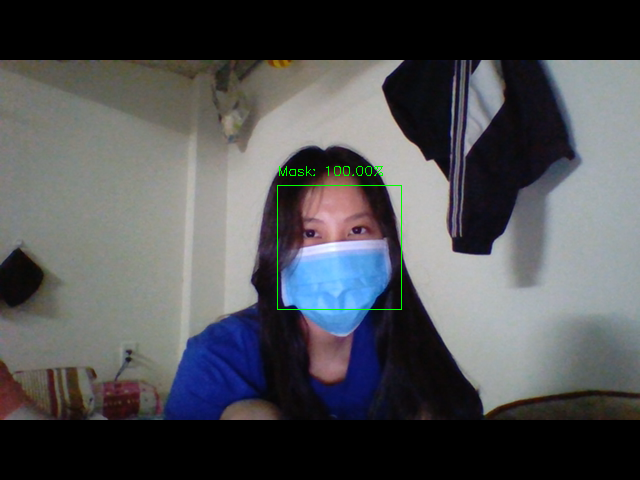
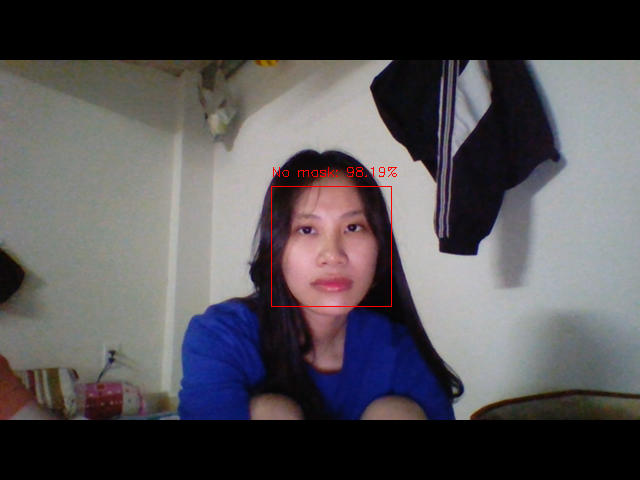
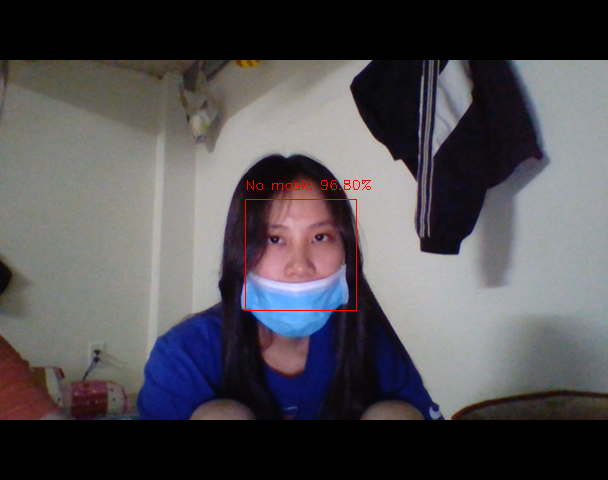